In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [161]:
gene_symbols = data["gene-symbol"].values

In [272]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3
...,...,...,...,...,...,...,...,...,...
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

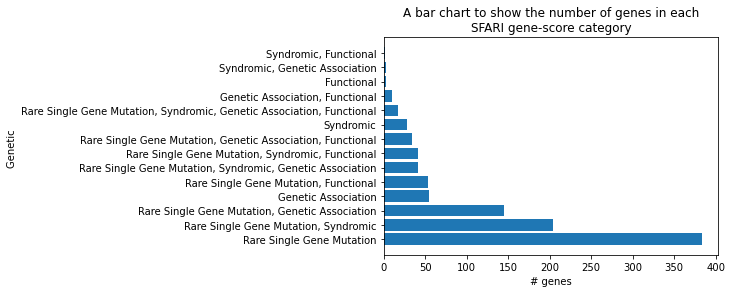

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

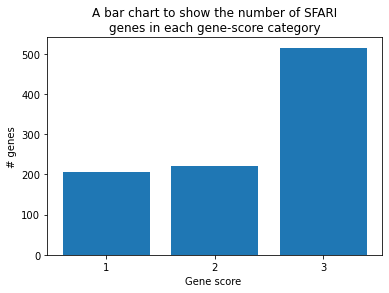

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1', '2', '3', 'S']


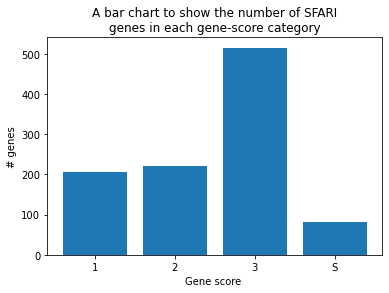

In [271]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = ["1", "2", "3", "S"]#[str(int(val)) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [157]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [229]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [ ]:
# Getting gene-names and ensemblIDs for the above genes^

In [255]:
gs = data["gene-symbol"]
ensembls = []
names = []

for g in gene_symbols:
    idx = gs[gs == g].index[0]
    ensembls.append(data["ensembl-id"].iloc[idx])
    names.append(data["gene-name"].iloc[idx])

In [ ]:
# load data manually from CSVs

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
#citation_data = []
#pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    #citation_data.append(gene_data["Citation"].values.size)
    #pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

In [ ]:
# load data dynamically from NCBI

In [165]:
for i in tqdm(gene_symbols):
    i

100%|██████████████████████████████████| 1023/1023 [00:00<00:00, 5138650.29it/s]


In [ ]:
Entrez.email = "s1803764@ed.ac.uk"
all_gene_dates = []
#ll_dates = []
zwilch = dates

for j, g in tqdm(enumerate(gene_symbols)):
    if j == 1022:
        all_gene_dates.append(zwilch)
    else:
        handle = Entrez.esearch(db="pubmed",retmax=10000, term=f"({g}[TW] OR {names[j]}[TW] OR {ensembls[j]}[TW]) AND (autism[MH] OR autistic[MH] OR ASD[TW] OR \"autism spectrum disorder\"[TW] OR \"pervasive developmental disorder\"[TW] OR PDD-NOS[TW] OR PDD[TW] OR asperger[MH])")
        record = Entrez.read(handle)
        ids = record["IdList"]
        #print(record["ErrorList"]["PhraseNotFound"])

        dates = []
        for i in tqdm(ids):
            handle2 = Entrez.esummary(db="pubmed", retmax=5000, id=i)
            meta_data = Entrez.read(handle2)[0]
            #print(meta_data["PubDate"])
            #print(meta_data["Title"])
            dates.append(meta_data["PubDate"][0:4])

        all_gene_dates.append(dates)
    #all_gene_dates[j] = dates

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
1it [00:03,  3.20s/it]
0it [00:00, ?it/s]
2it [00:04,  1.93s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.62it/s]
3it [00:07,  2.69s/it]
0it [00:00, ?it/s]
4it [00:08,  1.87s/it]
100%|███████████████████████████████████████████| 24/24 [00:14<00:00,  1.61it/s]
5it [00:24,  6.81s/it]
0it [00:00, ?it/s]
6it [00:24,  4.76s/it]
100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.01s/it]
7it [00:27,  4.07s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.57it/s]
8it [00:31,  4.06s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]
9it [00:32,  3.23s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]
10it [00:34,  2.64s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.65it/s]
11it [00:42,  4.45s/it]
100%|████████████████

100%|███████████████████████████████████████████| 42/42 [00:25<00:00,  1.63it/s]
15it [01:12,  9.47s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.25it/s]
16it [01:14,  7.30s/it]
100%|███████████████████████████████████████████| 47/47 [00:27<00:00,  1.72it/s]
17it [01:42, 13.56s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.48it/s]
18it [01:49, 11.53s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
19it [01:52,  8.85s/it]
0it [00:00, ?it/s]
20it [01:52,  6.41s/it]
0it [00:00, ?it/s]
21it [01:53,  4.67s/it]
0it [00:00, ?it/s]
22it [01:54,  3.45s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
23it [01:55,  2.76s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.40it/s]
24it [01:58,  2.79s/it]
0it [00:00, ?it/s]
25it [01:58,  2.15s/it]
0it [00:00, ?it/s]
26it [01:59,  1.70s/it]
100%|█████████████████████████████████████████████

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
28it [02:03,  1.82s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]
29it [02:06,  2.32s/it]
0it [00:00, ?it/s]
30it [02:07,  1.83s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.50it/s]
31it [02:10,  2.10s/it]
0it [00:00, ?it/s]
32it [02:10,  1.69s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.86it/s]
33it [02:12,  1.71s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.70it/s]
34it [02:17,  2.64s/it]
100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.52it/s]
35it [02:23,  3.64s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.56it/s]
36it [02:31,  5.06s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.62it/s]
37it [02:41,  6.33s/it]
0it [00:00, ?it/s]
38it [02:41,  4.65s/it]
0it [00:00, ?it/s]
39it [02:42,

100%|███████████████████████████████████████████| 25/25 [00:15<00:00,  1.66it/s]
53it [03:17,  5.91s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]
54it [03:19,  4.62s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
55it [03:21,  3.82s/it]
100%|███████████████████████████████████████████| 15/15 [00:09<00:00,  1.58it/s]
56it [03:31,  5.71s/it]
0it [00:00, ?it/s]
57it [03:32,  4.20s/it]
0it [00:00, ?it/s]
58it [03:32,  3.12s/it]
0it [00:00, ?it/s]
59it [03:33,  2.38s/it]
100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.55it/s]
60it [03:42,  4.37s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.52it/s]
61it [03:44,  3.85s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]
62it [03:52,  4.84s/it]
0it [00:00, ?it/s]
63it [03:52,  3.59s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]
64it [03:57,

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.59it/s]
69it [04:13,  3.79s/it]
100%|███████████████████████████████████████████| 35/35 [00:23<00:00,  1.50it/s]
70it [04:37,  9.85s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.59it/s]
71it [04:46,  9.41s/it]
0it [00:00, ?it/s]
72it [04:46,  6.79s/it]
100%|███████████████████████████████████████████| 26/26 [00:16<00:00,  1.53it/s]
73it [05:04, 10.03s/it]
0it [00:00, ?it/s]
74it [05:05,  7.30s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.76it/s]
75it [05:08,  5.95s/it]
0it [00:00, ?it/s]
76it [05:08,  4.34s/it]
0it [00:00, ?it/s]
77it [05:09,  3.22s/it]
 60%|███████████████████████████                  | 3/5 [00:01<00:01,  1.64it/s]


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]
78it [05:12,  3.34s/it]
0it [00:00, ?it/s]
79it [05:13,  2.59s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.54it/s]
80it [05:15,  2.44s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
81it [05:17,  2.15s/it]
100%|███████████████████████████████████████████| 60/60 [00:39<00:00,  1.53it/s]
82it [05:57, 13.49s/it]
100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.10s/it]
83it [06:03, 11.17s/it]
0it [00:00, ?it/s]
84it [06:04,  8.33s/it]
100%|█████████████████████████████████████████████| 3/3 [00:09<00:00,  3.28s/it]
85it [06:18,  9.98s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
86it [06:21,  7.85s/it]
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.50s/it]
87it [06:25,  6.83s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.4

100%|█████████████████████████████████████████████| 5/5 [00:07<00:00,  1.56s/it]
91it [06:44,  5.62s/it]
0it [00:00, ?it/s]
92it [06:47,  4.79s/it]
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.56s/it]
93it [06:52,  4.72s/it]
0it [00:00, ?it/s]
94it [06:53,  3.55s/it]
0it [00:00, ?it/s]
95it [06:55,  3.19s/it]
100%|███████████████████████████████████████████| 12/12 [00:21<00:00,  1.76s/it]
96it [07:19,  9.31s/it]
0it [00:00, ?it/s]
97it [07:19,  6.79s/it]
100%|█████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]
98it [07:30,  7.91s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
99it [07:34,  6.72s/it]
 68%|█████████████████████████████▎             | 60/88 [01:07<00:33,  1.21s/it]


100%|███████████████████████████████████████████| 88/88 [01:33<00:00,  1.07s/it]
100it [09:09, 33.13s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.56it/s]
101it [09:19, 26.18s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.71it/s]
102it [09:22, 19.26s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.57it/s]
103it [09:24, 14.27s/it]
100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.23s/it]
104it [09:29, 11.50s/it]
100%|███████████████████████████████████████████| 12/12 [00:09<00:00,  1.32it/s]
105it [09:40, 11.27s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.35it/s]
106it [09:43,  8.62s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.26it/s]
107it [09:45,  6.75s/it]
100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.32s/it]
108it [09:51,  6.45s/it]
100%|█████████████████████████████████████████

100%|███████████████████████████████████████████| 19/19 [00:56<00:00,  2.99s/it]
110it [11:18, 27.32s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
111it [11:22, 20.32s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]
112it [11:24, 14.82s/it]
100%|███████████████████████████████████████████| 18/18 [00:32<00:00,  1.79s/it]
113it [11:57, 20.26s/it]
100%|█████████████████████████████████████████████| 7/7 [00:10<00:00,  1.46s/it]
114it [12:10, 17.87s/it]
0it [00:00, ?it/s]
115it [12:10, 12.69s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]
116it [12:14,  9.91s/it]
0it [00:00, ?it/s]
117it [12:15,  7.23s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
118it [29:06, 308.53s/it]
0it [00:00, ?it/s]
119it [29:07, 216.16s/it]
100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.69it/s]
120it [29:17, 154.35s/it]
0it [00:00, ?it/s

100%|███████████████████████████████████████████| 44/44 [00:27<00:00,  1.62it/s]
131it [29:58, 11.98s/it]
0it [00:00, ?it/s]
132it [29:59,  8.62s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.42it/s]
133it [30:00,  6.44s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
134it [30:03,  5.30s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
135it [30:04,  4.09s/it]
0it [00:00, ?it/s]
136it [30:05,  3.08s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.66it/s]
137it [30:10,  3.48s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.64it/s]
138it [30:16,  4.29s/it]
0it [00:00, ?it/s]
139it [30:16,  3.21s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.47it/s]
140it [30:23,  4.30s/it]
0it [00:00, ?it/s]
141it [30:24,  3.21s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
1

100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.58it/s]
145it [30:44,  6.15s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
146it [30:46,  4.71s/it]
0it [00:00, ?it/s]
147it [30:46,  3.52s/it]
100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]
148it [30:50,  3.48s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.35it/s]
149it [30:52,  3.22s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.55it/s]
150it [30:55,  3.04s/it]
0it [00:00, ?it/s]
151it [30:56,  2.33s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]
152it [30:58,  2.37s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
153it [30:59,  2.01s/it]
0it [00:00, ?it/s]
154it [31:00,  1.59s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
155it [31:01,  1.52s/it]
100%|███████████████

100%|█████████████████████████████████████████| 100/100 [01:00<00:00,  1.66it/s]
160it [32:23, 21.61s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
161it [32:25, 15.77s/it]
0it [00:00, ?it/s]
162it [32:26, 11.22s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
163it [32:27,  8.22s/it]
 32%|██████████████                              | 8/25 [00:04<00:09,  1.74it/s]


100%|███████████████████████████████████████████| 25/25 [00:15<00:00,  1.66it/s]
164it [32:43, 10.49s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.53it/s]
165it [32:44,  7.75s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
166it [32:46,  5.85s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.49it/s]
167it [32:48,  4.70s/it]
0it [00:00, ?it/s]
168it [32:48,  3.49s/it]
0it [00:00, ?it/s]
169it [32:49,  2.64s/it]
0it [00:00, ?it/s]
170it [32:50,  2.03s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]
171it [32:51,  1.97s/it]
0it [00:00, ?it/s]
172it [32:52,  1.58s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]
173it [32:53,  1.45s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.56it/s]
174it [32:56,  1.79s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
1

100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.73it/s]
184it [33:38,  7.46s/it]
 60%|█████████████████████████                 | 86/144 [00:53<00:35,  1.62it/s]


100%|█████████████████████████████████████████| 144/144 [01:27<00:00,  1.64it/s]
185it [35:06, 31.77s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]
186it [35:08, 22.69s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.66it/s]
187it [35:10, 16.64s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.50it/s]
188it [35:14, 12.64s/it]
0it [00:00, ?it/s]
189it [35:14,  9.05s/it]
0it [00:00, ?it/s]
190it [35:15,  6.51s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
191it [35:17,  5.09s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.66it/s]
192it [35:26,  6.29s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.67it/s]
193it [35:30,  5.55s/it]
  0%|                                                     | 0/8 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.58it/s]
194it [35:35,  5.59s/it]
0it [00:00, ?it/s]
195it [35:36,  4.10s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]
196it [35:40,  3.99s/it]
0it [00:00, ?it/s]
197it [35:40,  2.97s/it]
0it [00:00, ?it/s]
198it [35:41,  2.32s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.60it/s]
199it [35:48,  3.80s/it]
0it [00:00, ?it/s]
200it [35:49,  2.84s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.60it/s]
201it [35:52,  2.81s/it]
100%|███████████████████████████████████████████| 12/12 [00:08<00:00,  1.36it/s]
202it [36:01,  4.79s/it]
0it [00:00, ?it/s]
203it [36:02,  3.55s/it]
0it [00:00, ?it/s]
204it [36:02,  2.67s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]
205it [36:04,  2.28s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
206it [36:05,  2.00

100%|███████████████████████████████████████████| 35/35 [00:22<00:00,  1.53it/s]
212it [36:39,  8.43s/it]
0it [00:00, ?it/s]
213it [36:40,  6.13s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
214it [36:41,  4.67s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.61it/s]
215it [36:44,  4.22s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
216it [36:46,  3.52s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.65it/s]
217it [36:52,  4.13s/it]
0it [00:00, ?it/s]
218it [36:52,  3.11s/it]
0it [00:00, ?it/s]
219it [36:53,  2.41s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]
220it [36:57,  2.86s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]
221it [36:58,  2.41s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
222it [37:00,  2.25s/it]
100%|███████████████

100%|███████████████████████████████████████████| 31/31 [00:20<00:00,  1.51it/s]
232it [38:01,  9.84s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.62it/s]
233it [38:05,  8.22s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
234it [38:07,  6.14s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]
235it [38:08,  4.66s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
236it [38:10,  3.84s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
237it [38:12,  3.27s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
238it [38:15,  3.21s/it]
0it [00:00, ?it/s]
239it [38:15,  2.48s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.62it/s]
240it [38:19,  2.67s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]
241it [38:20,  2.27s/it]
10

100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.75it/s]
253it [38:47,  3.16s/it]
100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.18s/it]
254it [38:53,  3.96s/it]
100%|███████████████████████████████████████████| 11/11 [00:07<00:00,  1.57it/s]
255it [39:01,  5.06s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.60it/s]
256it [39:06,  5.04s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
257it [39:08,  4.09s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.55it/s]
258it [39:12,  4.24s/it]
0it [00:00, ?it/s]
259it [39:13,  3.17s/it]
100%|███████████████████████████████████████████| 11/11 [00:09<00:00,  1.13it/s]
260it [39:23,  5.34s/it]
100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.19it/s]
261it [39:33,  6.51s/it]
100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.51s/it]
262it [39:59, 12.34s/it]
10

100%|███████████████████████████████████████████| 33/33 [00:20<00:00,  1.65it/s]
266it [40:33, 11.72s/it]
100%|███████████████████████████████████████████| 16/16 [00:11<00:00,  1.37it/s]
267it [40:46, 11.90s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.54it/s]
268it [40:51,  9.92s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.32it/s]
269it [40:59,  9.20s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.48it/s]
270it [41:01,  7.09s/it]
0it [00:00, ?it/s]
271it [41:01,  5.16s/it]
0it [00:00, ?it/s]
272it [41:02,  3.83s/it]
0it [00:00, ?it/s]
273it [41:03,  2.86s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
274it [41:05,  2.56s/it]
0it [00:00, ?it/s]
275it [41:05,  1.97s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
276it [41:07,  1.99s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]
2

100%|███████████████████████████████████████████| 26/26 [00:17<00:00,  1.48it/s]
280it [41:33,  7.07s/it]
0it [00:00, ?it/s]
281it [41:34,  5.16s/it]
100%|███████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]
282it [41:53,  9.31s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
283it [41:54,  6.86s/it]
0it [00:00, ?it/s]
284it [41:55,  4.99s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.72it/s]
285it [41:57,  4.21s/it]
 79%|██████████████████████████████████         | 42/53 [00:34<00:07,  1.50it/s]


100%|███████████████████████████████████████████| 53/53 [00:41<00:00,  1.28it/s]
286it [42:39, 15.52s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.63it/s]
287it [42:42, 11.65s/it]
0it [00:00, ?it/s]
288it [42:42,  8.36s/it]
0it [00:00, ?it/s]
289it [42:44,  6.22s/it]
0it [00:00, ?it/s]
290it [42:45,  4.66s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
291it [42:46,  3.72s/it]
0it [00:00, ?it/s]
292it [42:47,  2.79s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.41it/s]
293it [42:49,  2.60s/it]
0it [00:00, ?it/s]
294it [42:50,  2.09s/it]
0it [00:00, ?it/s]
295it [42:50,  1.65s/it]
0it [00:00, ?it/s]
296it [42:51,  1.35s/it]
0it [00:00, ?it/s]
297it [42:52,  1.13s/it]
0it [00:00, ?it/s]
298it [42:52,  1.00s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
299it [42:54,  1.19s/it]
0it [00:00, ?it/s]
300it [42:55,  1.05s/it]
100%|█████████████████████████

 32%|████████████▉                            | 123/390 [01:15<02:36,  1.71it/s]


 56%|███████████████████████▏                 | 220/390 [02:19<01:41,  1.67it/s]


 81%|█████████████████████████████████▎       | 317/390 [03:22<00:44,  1.66it/s]


100%|█████████████████████████████████████████| 390/390 [04:12<00:00,  1.55it/s]
315it [47:34, 77.80s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.58it/s]
316it [47:39, 55.98s/it]
 38%|████████████████▎                          | 14/37 [00:08<00:15,  1.53it/s]


100%|███████████████████████████████████████████| 37/37 [00:22<00:00,  1.62it/s]
317it [48:03, 46.24s/it]
100%|███████████████████████████████████████████| 56/56 [00:36<00:00,  1.55it/s]
318it [48:40, 43.42s/it]
0it [00:00, ?it/s]
319it [48:41, 30.83s/it]
0it [00:00, ?it/s]
320it [48:42, 21.78s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.52it/s]
321it [48:46, 16.45s/it]
0it [00:00, ?it/s]
322it [48:46, 11.70s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]
323it [48:48,  8.68s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
324it [48:51,  7.13s/it]


100%|███████████████████████████████████████████| 16/16 [00:10<00:00,  1.52it/s]
325it [49:03,  8.36s/it]
0it [00:00, ?it/s]
326it [49:03,  6.03s/it]
0it [00:00, ?it/s]
327it [49:04,  4.42s/it]
0it [00:00, ?it/s]
328it [49:05,  3.28s/it]
0it [00:00, ?it/s]
329it [49:05,  2.53s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
330it [49:08,  2.57s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
331it [49:10,  2.35s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
332it [49:11,  2.02s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
333it [49:13,  1.87s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]
334it [49:20,  3.45s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.51it/s]
335it [49:24,  3.63s/it]
0it [00:00, ?it/s]
336it [49:24,  2.75s/it]
0it [00:00, ?it/s]
337it [49:25,  2.10

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]
351it [49:56,  3.79s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
352it [49:57,  3.03s/it]
0it [00:00, ?it/s]
353it [49:58,  2.32s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
354it [50:00,  2.17s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
355it [50:01,  2.06s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.40it/s]
356it [50:04,  2.28s/it]
100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.61it/s]
357it [50:19,  6.17s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
358it [50:21,  4.84s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]
359it [50:24,  4.10s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
360it [50:27,  3.79s/it]
10

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]
369it [51:28,  7.66s/it]
100%|███████████████████████████████████████████| 16/16 [00:20<00:00,  1.31s/it]
370it [51:52, 12.65s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.72it/s]
371it [52:00, 11.34s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
372it [52:02,  8.64s/it]
0it [00:00, ?it/s]
373it [52:03,  6.22s/it]
 85%|████████████████████████████████████▋      | 58/68 [00:38<00:05,  1.68it/s]


100%|███████████████████████████████████████████| 68/68 [00:45<00:00,  1.51it/s]
374it [52:49, 18.10s/it]
0it [00:00, ?it/s]
375it [52:49, 12.86s/it]
100%|███████████████████████████████████████████| 33/33 [00:18<00:00,  1.75it/s]
376it [53:09, 14.87s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.72it/s]
377it [53:13, 11.51s/it]
100%|███████████████████████████████████████████| 20/20 [00:12<00:00,  1.62it/s]
378it [53:26, 11.95s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.71it/s]
379it [53:33, 10.68s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.75it/s]
380it [53:40,  9.42s/it]


0it [00:00, ?it/s]
381it [53:40,  6.77s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
382it [53:42,  5.13s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
383it [53:43,  3.94s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.68it/s]
384it [53:50,  4.74s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]
385it [53:53,  4.33s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
386it [53:54,  3.41s/it]
0it [00:00, ?it/s]
387it [53:55,  2.59s/it]
0it [00:00, ?it/s]
388it [53:56,  2.02s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
389it [53:57,  1.96s/it]
0it [00:00, ?it/s]
390it [53:58,  1.55s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.47it/s]
391it [54:01,  2.12s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
3

In [268]:
len(dates)

5674

In [233]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_dates[i]) < min_date:
            min_date = np.min(all_dates[i])
    print()
print(min_date)

NRXN1
119
Counter({'2019': 15, '2012': 12, '2021': 10, '2015': 10, '2014': 10, '2013': 10, '2009': 10, '2020': 8, '2011': 8, '2018': 7, '2017': 5, '2008': 5, '2010': 4, '2016': 3, '2007': 1, '2004': 1})

SHANK3
331
Counter({'2021': 49, '2020': 44, '2019': 39, '2018': 38, '2016': 31, '2017': 29, '2015': 22, '2014': 21, '2011': 13, '2013': 12, '2012': 12, '2009': 8, '2008': 5, '2007': 4, '2010': 2, '1993': 1, '2005': 1})

MECP2
261
Counter({'2016': 29, '2011': 21, '2019': 18, '2014': 18, '2017': 17, '2020': 16, '2015': 14, '2012': 14, '2018': 13, '2010': 13, '2009': 13, '2021': 12, '2013': 12, '2008': 12, '2007': 11, '2005': 8, '2004': 5, '2003': 5, '2006': 4, '2002': 2, '2000': 2, '1993': 1, '2001': 1})

SCN2A
64
Counter({'2021': 14, '2019': 13, '2020': 8, '2018': 6, '2017': 5, '2016': 5, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2004': 2, '2012': 1, '2010': 1, '2003': 1})

SCN1A
40
Counter({'2021': 7, '2020': 5, '2012': 5, '2019': 4, '2018': 4, '2013': 3, '2016': 2, '2015': 2, '2004

In [257]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_gene_dates):
    all_gene_dates[i] = list(map(int, el))
    print(gene_symbols[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_gene_dates[i]) < min_date:
            min_date = np.min(all_gene_dates[i])
    print()
print(min_date)

ABAT
4
Counter({'2018': 1, '2017': 1, '2012': 1, '2005': 1})

ABCA10
0
Counter()

ABCA13
4
Counter({'2018': 2, '2020': 1, '2016': 1})

ABCA7
0
Counter()

ACE
24
Counter({'2021': 5, '2020': 5, '2019': 3, '2016': 2, '2014': 2, '2010': 2, '2018': 1, '2017': 1, '2015': 1, '2012': 1, '1998': 1})

ACHE
0
Counter()

ACTB
2
Counter({'2019': 1, '2016': 1})

ACTL6B
5
Counter({'2020': 2, '2019': 1, '2017': 1, '2014': 1})

ACTN4
1
Counter({'2018': 1})

ACY1
1
Counter({'2010': 1})

ADA
13
Counter({'2013': 3, '2019': 2, '2020': 1, '2011': 1, '2008': 1, '2004': 1, '2002': 1, '2001': 1, '2000': 1, '1982': 1})

ADCY3
1
Counter({'2019': 1})

ADCY5
1
Counter({'2017': 1})

ADK
0
Counter()

ADNP
42
Counter({'2021': 7, '2020': 7, '2019': 7, '2018': 7, '2017': 4, '2016': 4, '2015': 3, '2014': 2, '1993': 1})

ADORA3
2
Counter({'2013': 1, '2011': 1})

ADSL
47
Counter({'2013': 6, '2012': 5, '1989': 4, '2021': 3, '2015': 3, '2000': 3, '2020': 2, '2017': 2, '2011': 2, '2004': 2, '1986': 2, '2019': 1, '2018': 1, '

In [205]:
# get best 10 genes (based on literature)
top10 = np.zeros((10,2))

for i, el in tqdm(enumerate(all_gene_dates)):
    num = len(el)
    for j in range(top10.shape[0]):
        if num > top10[j, 0]:
            top10[j, 0] = num
            top10[j, 1] = i
            break
                
print(top10)
print(top10_idx)

1023it [00:00, 311331.66it/s]

[[4451. 1022.]
 [ 415.  921.]
 [ 216.  812.]
 [ 148.  510.]
 [ 135.  541.]
 [ 131.  745.]
 [ 103.  626.]
 [  97.  833.]
 [  75.  811.]
 [  55.  932.]]
[1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022]


In [193]:
genes = []
gene_idxs = []
new_years = []

for i in range(top10.shape[0]):
    idx = int(top10[i, 1])
    print(gene_symbols[idx])
    genes.append(gene_symbols[idx])
    gene_idxs.append(idx)
    new_years.append(all_gene_dates[idx])

ZWILCH
TEK
SHANK3
MECP2
MTOR
RAD21
OXTR
SLC6A4
SHANK2
TRIO


In [152]:
from collections import Counter

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    print()

NRXN1
76
Counter({'2019': 9, '2012': 9, '2015': 7, '2013': 7, '2009': 7, '2021': 6, '2014': 6, '2011': 6, '2020': 5, '2017': 4, '2018': 2, '2016': 2, '2010': 2, '2008': 2, '2007': 1, '2004': 1})

SHANK3
216
Counter({'2020': 29, '2018': 26, '2019': 20, '2021': 19, '2017': 19, '2016': 19, '2015': 17, '2014': 17, '2013': 12, '2011': 11, '2012': 9, '2009': 8, '2008': 4, '2010': 3, '2007': 3})

MECP2
148
Counter({'2016': 14, '2015': 12, '2013': 11, '2011': 10, '2020': 9, '2017': 9, '2019': 8, '2014': 8, '2009': 8, '2021': 7, '2008': 7, '2005': 7, '2018': 6, '2012': 6, '2010': 5, '2007': 5, '2004': 4, '2003': 4, '2006': 3, '2002': 2, '2000': 2, '2001': 1})

SCN2A
41
Counter({'2021': 7, '2019': 6, '2017': 5, '2020': 4, '2018': 4, '2016': 3, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2012': 1, '2010': 1, '2004': 1, '2003': 1})

SCN1A
19
Counter({'2018': 3, '2012': 3, '2020': 2, '2013': 2, '2021': 1, '2019': 1, '2016': 1, '2015': 1, '2011': 1, '2009': 1, '2008': 1, '2004': 1, '2003': 1})



# Task 5

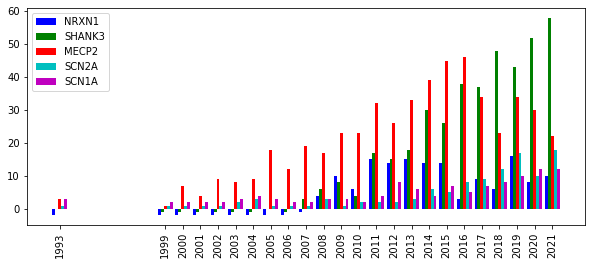

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

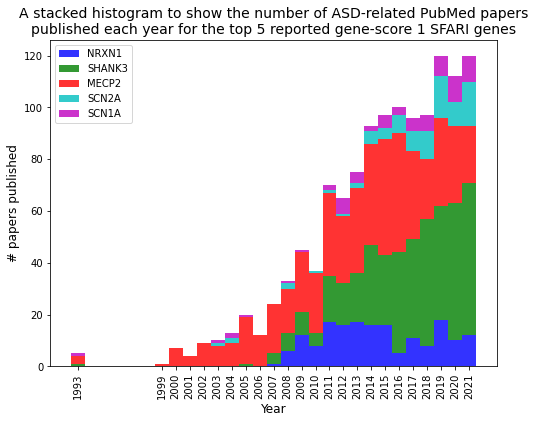

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

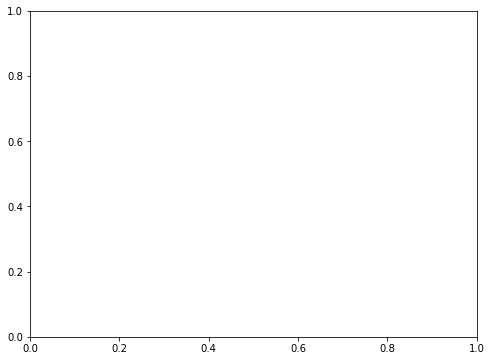

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


Text(0, 0.5, '# papers published')

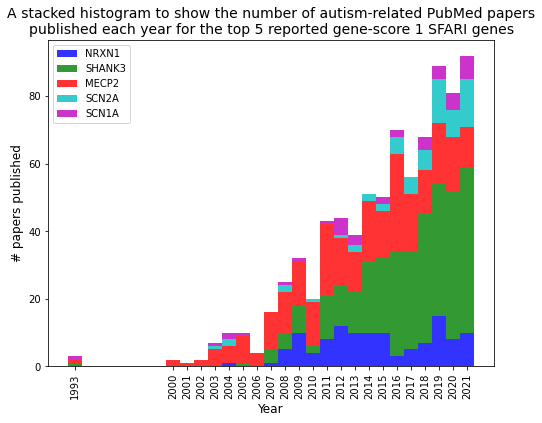

In [254]:
years = np.arange(2000,2022)
year_labels = np.insert(years, 0, 1993)
year_range = np.arange(1993,2023)
n_bins = year_labels.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, year_range, density=0, histtype="bar", stacked=True, color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(year_labels+0.5, year_labels, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

Text(0, 0.5, '# papers published')

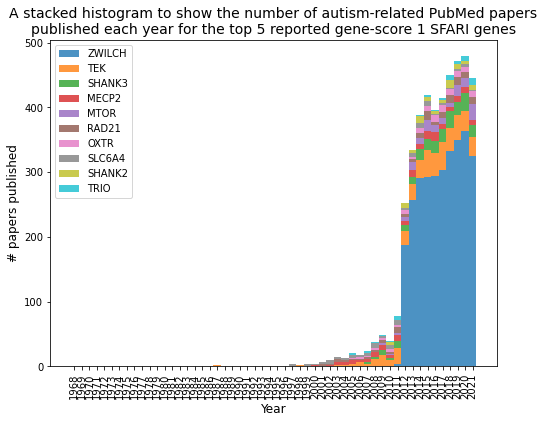

In [207]:
years = np.arange(1968,2022,1)
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(new_years, range(1968,2023), density=0, histtype="bar", stacked=True, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
ensembls[1022]